In [1]:
%matplotlib inline
import proplot as pplt # plotting
import xarray as xr # netCDF Handling
import xesmf as xe # might be useful
#import BG.readDat as readDat # might be useful 
import numpy as np # might be useful
import pandas as pd # for reading the csv files
import datetime as dt # for date handling
from matplotlib import pyplot as plt # for plotting

# Convert the Michel dataset to netcdf
-> re-sort the data according to depth/ trasnform it into a 3 dimensional space!

In [2]:
# read the cleaned dataset (Michel)
df = pd.read_csv('OUTPUT/Michel_2021.csv')
# read _a_ NAA file for the coordinates
ncds = xr.open_dataset('DATA/NAA_Area_Volume.nc') # this is the updated file with corrected depth cut-offs 
z = [0]
zc  = list(ncds.z_cuts.values)
zcu = z + zc
dpth = ncds.deptht.values

df_l = list(df)
print(df_l)
df

['index', 'Cruise', 'Descriptor', 'Institute', 'Protocol', 'Platform', 'Geographic Region', 'Date', 'Station', 'Latitude', 'Longitude', 'Target property', 'Depth [m]', 'Sample#', 'Pressure (db)', 'Temp in situ (ºC) (CTD)', 'DO (mL/L) (CTD)', 'Sal (CTD)', 'TIC (umol/Kg)', 'TIC Flag', 'TA (umol/Kg)', 'TA Flag', 'Comment', 'pH', 'pCO2 (matm)', 'OmC', 'OmA', 'Comments', 'pH ', 'pCO2  (matm)', 'lons', 'lats', 'lonmin', 'lonmax', 'latmin', 'latmax', 'NAA_deptht', 'X_NAA', 'Y_NAA']


,index,Cruise,Descriptor,Institute,Protocol,Platform,Geographic Region,Date,Station,Latitude,...,pCO2 (matm),lons,lats,lonmin,lonmax,latmin,latmax,NAA_deptht,X_NAA,Y_NAA
0,0,CBS-MEA 2017,18DN170803,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2017-08-03 00:00:00,KUG1,70.011367,...,NaN,-133.85,70.01,-133.95,-133.75,69.91,70.11,19.976637,"[125, 126]","[112, 113]"
1,1,CBS-MEA 2017,18DN170803,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2017-08-03 00:00:00,KUG1,70.011367,...,NaN,-133.85,70.01,-133.95,-133.75,69.91,70.11,3.919968,"[125, 126]","[112, 113]"
2,2,CBS-MEA 2017,18DN170803,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2017-08-04 00:00:00,KUG2,70.848517,...,NaN,-134.67,70.85,-134.77,-134.57,70.75,70.95,79.462662,[130],[120]
3,3,CBS-MEA 2017,18DN170803,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2017-08-04 00:00:00,KUG2,70.848517,...,NaN,-134.67,70.85,-134.77,-134.57,70.75,70.95,47.596622,[130],[120]
4,4,CBS-MEA 2017,18DN170803,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2017-08-04 00:00:00,KUG2,70.848517,...,NaN,-134.67,70.85,-134.77,-134.57,70.75,70.95,19.976637,[130],[120]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,243,CBS-MEA 2019,NaN,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2019-09-09 00:00:00,MTI_02,71.254333,...,682.446650,-118.19,71.25,-118.29,-118.09,71.15,71.35,160.897079,[172],[92]
726,244,CBS-MEA 2019,NaN,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2019-09-09 00:00:00,MTI_02,71.254333,...,625.836235,-118.19,71.25,-118.29,-118.09,71.15,71.35,101.285614,[172],[92]
727,245,CBS-MEA 2019,NaN,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2019-09-09 00:00:00,MTI_02,71.254333,...,337.642745,-118.19,71.25,-118.29,-118.09,71.15,71.35,61.806988,[172],[92]
728,246,CBS-MEA 2019,NaN,FWI,CBS-MEA,F/V Frosti,Beaufort Sea,2019-09-09 00:00:00,MTI_02,71.254333,...,394.980633,-118.19,71.25,-118.29,-118.09,71.15,71.35,19.976637,[172],[92]


In [3]:
ts = pd.to_datetime(df['Date'])
year =ts[0].strftime('%Y')
month =ts[0].strftime('%m')
print(year)
print(month)

2017
08


In [4]:
len(df)


730

In [5]:
# Get list of Stations
# update Oct 2022: Station ID
ts = pd.to_datetime(df['Date'])
#year = []
#m = []
Stat_ID = [] 
for h in range(0,len(df)): 
 y =ts[h].strftime('%Y')
 m =ts[h].strftime('%m')
 ID = y+'-'+m + '_CBS-MEA_CDT_' +df.loc[h]['Station']
 Stat_ID.append(ID)

df['CS'] = Stat_ID
Sl = df['CS'].unique()



In [6]:
coord = pd.DataFrame(columns = ['CS', 'Date', 'Latitude', 'Longitude', 'X_NAA',  'Y_NAA', 'latmax', 'lonmax', 'latmin', 'lonmin', 'lons', 'lats'])
for i in range(0,len(Sl)): 
  slce = df.loc[df['CS']== Sl[i]]
  coord.loc[len(coord)] = slce.iloc[0][['CS', 'Date', 'Latitude', 'Longitude', 'X_NAA',  'Y_NAA', 'latmax', 'lonmax', 'latmin', 'lonmin', 'lons', 'lats']]
#coord

# drop all coordinates and redundant data
df.drop(['index', 'Descriptor', 'Institute', 'Protocol', 'Platform', 'Geographic Region', 'Target property','Comments','Comment', 'Cruise', 'Station', 
        'TA Flag', 'X_NAA',  'Y_NAA', 'latmax', 'lonmax', 'latmin', 'lonmin', 'lons', 'lats', 'pH ', 'pCO2  (matm)'], axis = 1, inplace = True)

#df.set_index('CS')
#df

In [7]:
# round the depth values to uniform length
df['NAA_deptht'] = df['NAA_deptht'].round(5)
print(list(df))

df = df.rename( columns = {'Sample#': 'Sample',
 'Temp in situ (ºC) (CTD)':'Temp_C' ,
 'DO (mL/L) (CTD)': 'DO',
 'TIC (umol/Kg)': 'TIC',
 'TA (umol/Kg)': 'TA',
 'pCO2 (matm)': 'pCO2_matm', 
 #'pCO2  (matm)': 'pco2_matm', 
 'Depth [m]': 'Depth',
 'Sal (CTD)': 'Sal',
 'Pressure (db)': 'Pressure'
})

print(list(df))


['Date', 'Latitude', 'Longitude', 'Depth [m]', 'Sample#', 'Pressure (db)', 'Temp in situ (ºC) (CTD)', 'DO (mL/L) (CTD)', 'Sal (CTD)', 'TIC (umol/Kg)', 'TIC Flag', 'TA (umol/Kg)', 'pH', 'pCO2 (matm)', 'OmC', 'OmA', 'NAA_deptht', 'CS']
['Date', 'Latitude', 'Longitude', 'Depth', 'Sample', 'Pressure', 'Temp_C', 'DO', 'Sal', 'TIC', 'TIC Flag', 'TA', 'pH', 'pCO2_matm', 'OmC', 'OmA', 'NAA_deptht', 'CS']


In [8]:
dpth = list(dpth.round(5))
#dpth

In [9]:
def create_array(dat, dct ): 
    '''wraper to create the individual arrays'''
    ds = xr.Dataset(dat)
    ds= ds.assign_coords(coords ={'Station': dct['CS']})  
    ds= ds.assign(date_time= dct['Date'], 
                    Latitude= dct['Latitude'], 
                    Longitude= dct['Longitude'], 
                    X_NAA= dct['X_NAA'],  
                    Y_NAA= dct['Y_NAA'], 
                    latmax= dct['latmax'], 
                    lonmax= dct['lonmax'], 
                    latmin= dct['latmin'], 
                    lonmin= dct['lonmin'], 
                    lons= dct['lons'], 
                    lats= dct['lats'],
                    Stat_id = dct['CS']
                    #deptht= dpth )
    )
    return(ds)

In [10]:
#ds = xr.Dataset(data_vars = None, coords =  {'Station':'dummy', 
                                              #'deptht': dpth })
val_list = ['Depth', 'Sample', 'Pressure', 'Temp_C', 'DO', 'Sal', 'TIC','TA', 'pH', 
            'pCO2_matm', 'OmC', 'OmA'] #'Latitude', 'Longitude',

cp = pd.DataFrame({'NAA_deptht': dpth})
# select a single Station 
slce = df.loc[df['CS']== Sl[i]].sort_values(by = 'Depth')

# put it into the mode deptht bins
#slce.groupby_bins(slce.Depth, bins = zcu, labels = d).mean()
##### 
# Do a linear interpolation instead!  
for l in val_list: 
  new_val = np.interp(dpth, # levels where I want the new values 
                  slce['Depth'], # points where I know the value
                  slce[l],  # the value at that point.
                  )
  #print(new_val[0])
  cp[l] = new_val
cp = cp.set_index(['NAA_deptht'])
#print(i)

# now turn this into a data-array with the name CS
ds = create_array(dat = cp, dct = coord.loc[i])

for i in range(1,len(Sl)): 
  cp = pd.DataFrame({'NAA_deptht': dpth})
  
  # select a single Station 
  slce = df.loc[df['CS']== Sl[i]].sort_values(by = 'Depth')
  
  # put it into the mode deptht bins
  #slce.groupby_bins(slce.Depth, bins = zcu, labels = d).mean()
  ##### 
  # Do a linear interpolation instead!  
  for l in val_list: 
    new_val = np.interp(dpth, # levels where I want the new values 
                    slce['Depth'], # points where I know the value
                    slce[l],  # the value at that point.
                    )
    #print(new_val[0])
    cp[l] = new_val
  cp = cp.set_index(['NAA_deptht'])
  #print(i)
 
  # now turn this into a data-array with the name CS
  aslce = create_array(dat = cp, dct = coord.loc[i])
                                    
  #print(aslce.pH.shape)
  ds = xr.concat([ds, aslce], dim = 'Station')

ds
# WORKS! 

<xarray.Dataset>
Dimensions:     (NAA_deptht: 46, Station: 124)
Coordinates:
  * NAA_deptht  (NAA_deptht) float64 0.5487 1.973 3.92 ... 5.622e+03 5.878e+03
  * Station     (Station) <U27 '2019-09_CBS-MEA_CDT_MTI_02' ... '2019-09_CBS-...
Data variables: (12/24)
    Depth       (Station, NAA_deptht) float64 5.1 5.1 5.1 ... 209.9 209.9 209.9
    Sample      (Station, NAA_deptht) float64 637.0 637.0 637.0 ... 624.0 624.0
    Pressure    (Station, NAA_deptht) float64 5.1 5.1 5.1 ... 212.2 212.2 212.2
    Temp_C      (Station, NAA_deptht) float64 4.874 4.874 ... -0.0511 -0.0511
    DO          (Station, NAA_deptht) float64 7.45 7.45 7.45 ... 4.76 4.76 4.76
    Sal         (Station, NAA_deptht) float64 28.8 28.8 28.8 ... 34.47 34.47
    ...          ...
    lonmax      (Station) float64 -118.1 -134.6 -134.7 ... -116.4 -117.2 -118.1
    latmin      (Station) float64 71.15 70.75 70.83 70.88 ... 71.3 71.2 71.15
    lonmin      (Station) float64 -118.3 -134.8 -134.8 ... -116.6 -117.4 -118.3
    lons        (Station) float64 -118.2 -134.7 -134.8 ... -116.5 -117.3 -118.2
    lats        (Station) float64 71.25 70.85 70.93 70.98 ... 71.4 71.3 71.25
    Stat_id     (Station) <U27 '2019-09_CBS-MEA_CDT_MTI_02' ... '2019-09_CBS-...

In [11]:
# Assign attributes and save to file
ds.attrs = { 'script': 'created with Michel_to_NAA_nc.ipynb -- JLanger',
             'cluster': 'Aeolus - Uvic',
              'creation Date--time': str(dt.datetime.now()), 
              'Data-source': 'Christine Michel', 
              'Note': 'Citation not clear, might not be published yet'}

ds.to_netcdf('OUTPUT/Michel_2021_NAA.nc')


In [12]:
# stop the script from automatically running further
import sys
sys.exit()

SystemExit: 

/home/jlanger/anaconda3/envs/jos_env_3-9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Below are some tests. Can be ignored

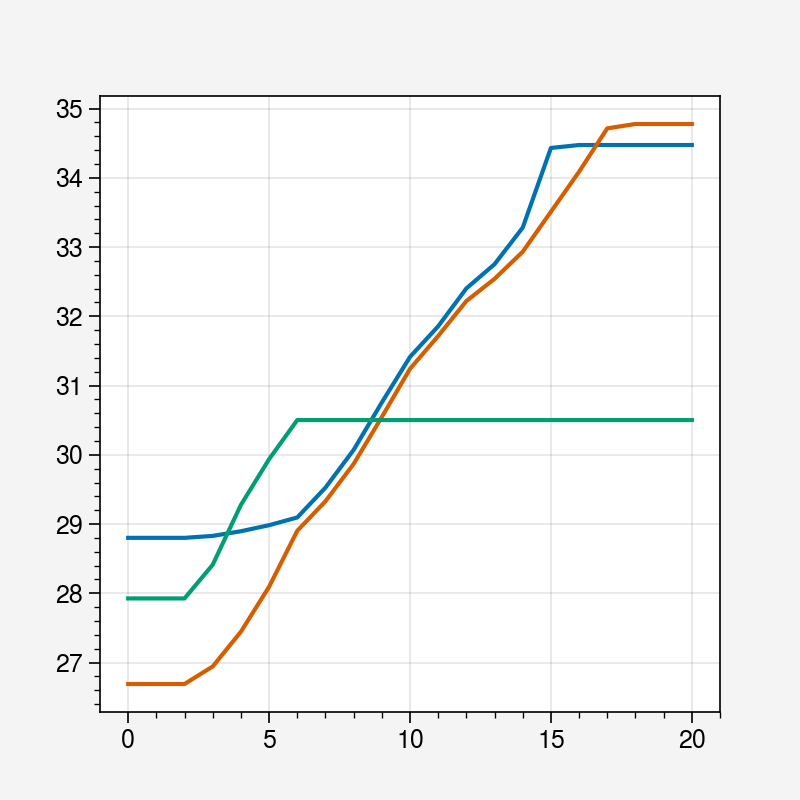

In [ ]:
plt.plot(ds['Sal'][0,:21])
plt.plot(ds.Sal[3,:21])
plt.plot(ds.Sal[7,:21])

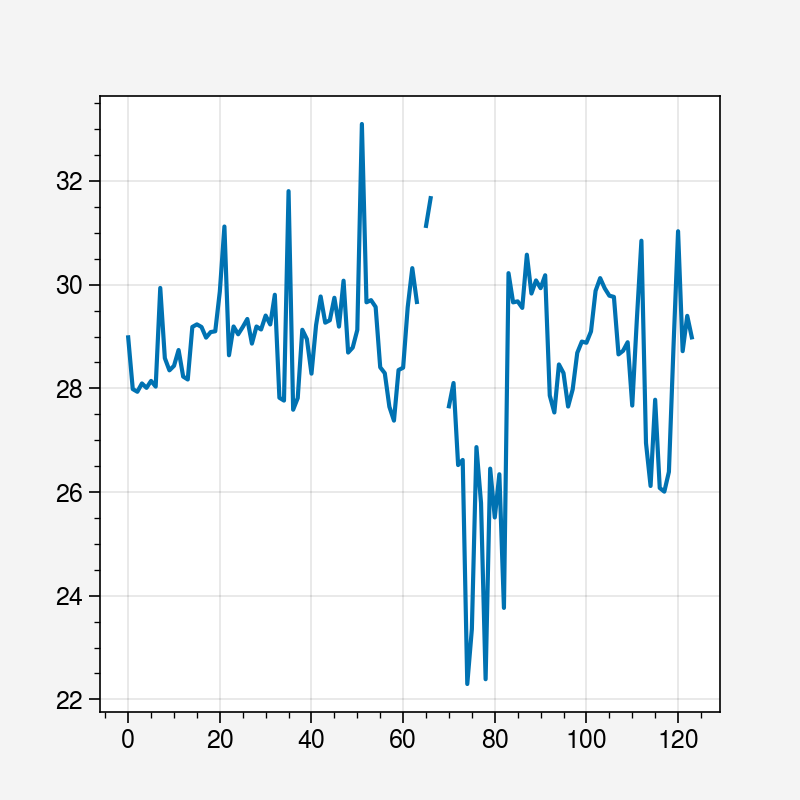

In [ ]:
plt.plot(ds.Sal[:,5])

In [ ]:
cp = pd.DataFrame({'NAA_deptht': dpth})
#cp['Depth [m]', 'Sample#', 'Pressure (db)', 'Temp in situ (ºC) (CTD)', 'DO (mL/L) (CTD)', 'Sal (CTD)', 'TIC (umol/Kg)', 'TIC Flag', 'TA (umol/Kg)', 'TA Flag', 'pH', 'pCO2 (matm)','OmC',
#      'OmA', 'pH ', 'pCO2  (matm)', 'CS'] = np.nan


slce = df.loc[df['CS']== Sl[2]]
slce


,Date,Latitude,Longitude,Depth,Sample,Pressure,Temp_C,DO,Sal,TIC,TIC Flag,TA,pH,pCO2_matm,OmC,OmA,NAA_deptht,CS
6,2017-08-04 00:00:00,70.933933,-134.7498,200.3,14.0,202.4,-1.3235,5.99,33.3730,2235.381344,NaN,NaN,NaN,NaN,NaN,NaN,200.70035,2017-08_CBS-MEA_CDT_KUG3
7,2017-08-04 00:00:00,70.933933,-134.7498,180.4,15.0,182.4,-1.3218,6.07,33.0562,2228.344560,NaN,NaN,NaN,NaN,NaN,NaN,200.70035,2017-08_CBS-MEA_CDT_KUG3
8,2017-08-04 00:00:00,70.933933,-134.7498,100.5,17.0,101.6,-1.0531,7.00,32.1510,2151.821022,NaN,2227.086039,7.961995,459.018061,1.636914,1.023132,101.28561,2017-08_CBS-MEA_CDT_KUG3
9,2017-08-04 00:00:00,70.933933,-134.7498,59.9,20.0,60.5,-0.4170,8.22,31.3284,2080.306655,NaN,2192.006026,8.082087,338.811787,2.106066,1.313369,61.80699,2017-08_CBS-MEA_CDT_KUG3
10,2017-08-04 00:00:00,70.933933,-134.7498,50.2,22.0,50.7,-0.0130,8.63,30.6449,2038.914018,NaN,2164.896757,8.129692,298.768413,2.304383,1.434446,47.59662,2017-08_CBS-MEA_CDT_KUG3
11,2017-08-04 00:00:00,70.933933,-134.7498,19.9,25.0,20.1,1.0009,8.40,28.7286,NaN,NaN,2055.734575,8.018369,384.803325,1.748287,1.081930,19.97664,2017-08_CBS-MEA_CDT_KUG3
12,2017-08-04 00:00:00,70.933933,-134.7498,5.0,27.0,5.0,3.7320,7.62,26.6025,1832.946081,NaN,1914.726613,8.005878,382.080710,1.689237,1.039555,6.51773,2017-08_CBS-MEA_CDT_KUG3


In [ ]:
# Do a linear interpolatslce['Depth [m]']ion instead!  
slce['Pressure (db)']
#
fu = slce.sort_values(by = 'Depth [m]')

val_list = [ 'Depth [m]', 'Pressure (db)',  'Temp in situ (ºC) (CTD)', 'DO (mL/L) (CTD)','Sal (CTD)']
for l in val_list: 
    new_val = np.interp(dpth, # levels where I want the new values 
                    fu['Depth [m]'], # points where I know the value
                    fu[l],  # the value at that point.
                    )
    cp[l] = new_val

KeyError: 'Pressure (db)'

Some values of this fucking dataset are doupled per gridcell. I need to build in a switch to find them and take the mean!

In [ ]:
cp

,NAA_deptht,Depth [m],Pressure (db),Temp in situ (ºC) (CTD),DO (mL/L) (CTD),Sal (CTD)
0,0.54869,5.00000,5.000000,3.732000,7.620000,26.602500
1,1.97269,5.00000,5.000000,3.732000,7.620000,26.602500
2,3.91997,5.00000,5.000000,3.732000,7.620000,26.602500
3,6.51773,6.51773,6.538102,3.453807,7.699452,26.819067
4,9.92318,9.92318,9.989263,2.829604,7.877724,27.304995
5,14.33011,14.33011,14.455346,2.021835,8.108422,27.933825
6,19.97664,19.97664,20.177399,0.998335,8.400582,28.733447
7,27.15419,27.15419,27.426014,0.758160,8.455065,29.187386
8,36.21767,36.21767,36.579231,0.454877,8.523864,29.760598
9,47.59662,47.59662,48.070844,0.074114,8.610238,30.480251
